# Importing Basic Libraries

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import DBSCAN
%matplotlib inline
df = pd.read_json('livedata.json')
df

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273
...,...,...,...,...
575,Judy,2020-07-04 11:33:20,13.119027,77.624903
576,Judy,2020-07-04 05:25:03,13.105079,77.632080
577,Judy,2020-07-04 18:17:47,13.188776,77.617570
578,Judy,2020-07-04 06:00:21,13.052740,77.635606


# Plotting ScatterPlot

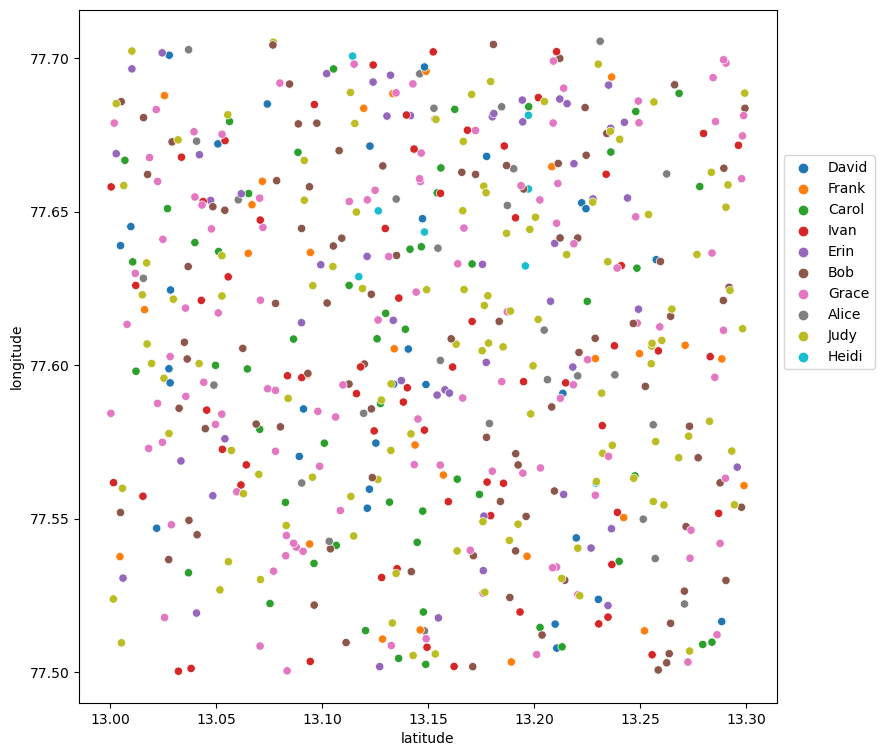

In [236]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8])
plt.show()

# DBSCAN Model Clustering

In [237]:
model = DBSCAN(eps=0.0018288, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

In [238]:
df

,id,timestamp,latitude,longitude,cluster
0,David,2020-07-04 15:35:30,13.148953,77.593651,-1
1,David,2020-07-04 16:35:30,13.222397,77.652828,-1
2,Frank,2020-07-04 14:35:30,13.236507,77.693792,-1
3,Carol,2020-07-04 21:35:30,13.163716,77.562842,-1
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273,-1
...,...,...,...,...,...
575,Judy,2020-07-04 11:33:20,13.119027,77.624903,-1
576,Judy,2020-07-04 05:25:03,13.105079,77.632080,-1
577,Judy,2020-07-04 18:17:47,13.188776,77.617570,23
578,Judy,2020-07-04 06:00:21,13.052740,77.635606,-1


# Exporting to CSV

In [239]:
df.to_csv('clustered.csv', index=False)

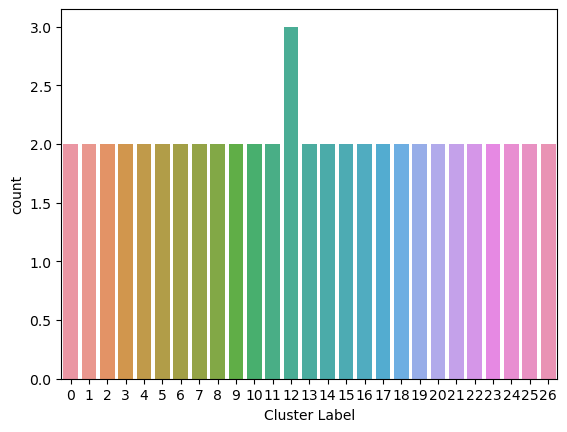

In [244]:
a=model.labels_
sns.countplot(x=a[a != -1])
plt.xlabel('Cluster Label')
plt.show()

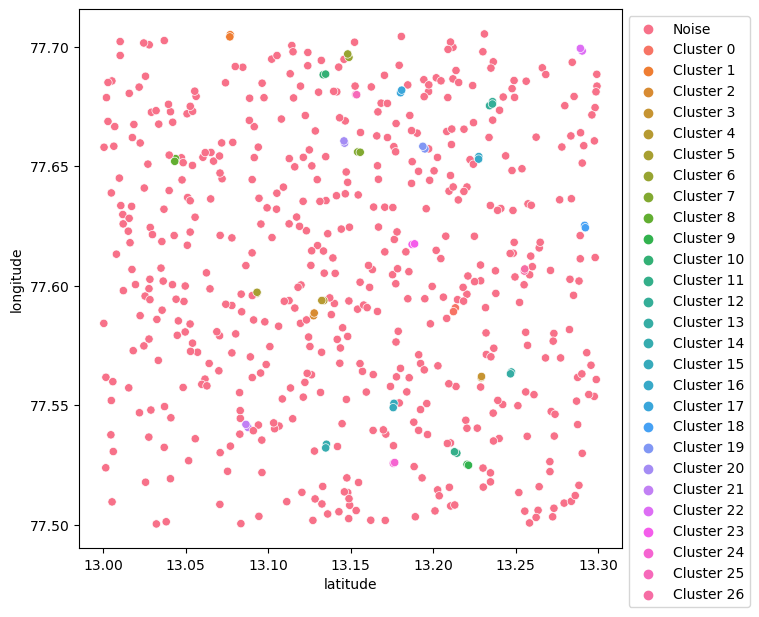

In [241]:
fig = plt.figure(figsize=(7,7))
sns.scatterplot(x=df['latitude'],y=df['longitude'],data=df, hue = ['Cluster {}'.format(x) if x != -1 else "Noise" for x in model.labels_])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [242]:
def get_infected_names(input_name):
    infected_names = []
    for cluster in set(df.loc[df['id'] == input_name, 'cluster']):
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            infected_names.extend(ids_in_cluster[(ids_in_cluster != input_name) & (~ids_in_cluster.isin(infected_names))])
    return infected_names

In [243]:
get_infected_names("Bob")

['Judy', 'Frank', 'Erin', 'Grace']